<a href="https://colab.research.google.com/github/rahulagarwak/Stats2/blob/main/Statistics_Extra_Activity_Week_9_Rahul_21f1002690.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability in Python

# Importing packages

In [2]:
import numpy as np

# Import statistics module
We will use scipy.stats, which has several functions for statistics and probability distributions. 

In [3]:
import scipy.stats as st

# Import pandas, matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Fitting a distribution and estimating parameters
To fit the Normal Distribution I will be using Iris Dataset to approximate the normal distribution for Sepal Length of ***Iris-Setosa*** class of plant.

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

Text(0.5, 1.0, 'Sepal Length- Iris-Setosa')

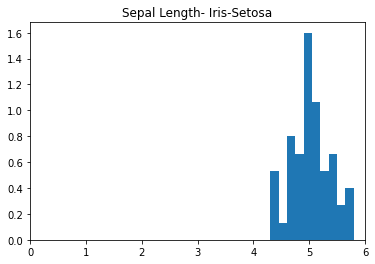

In [6]:
plt.hist(iris.data[:50,0], density = True)
plt.xlim([0,6])
plt.title('Sepal Length- Iris-Setosa')

We see that there are 3935 samples of data. To get a sense of the distribution, we should plot a histogram.

# Fitting a Normal distribution
From the histogram, the distribution could be modelled as Normal$(\mu,\sigma^2)$. The next step is to estimate $\mu$ and $\sigma$ from the given samples.

## Method of moments
Suppose $m_1$ and $m_2$ are the first and second moments of the samples. The method of moments estimates are obtained by solving
$$m_1= E[X] =\mu,$$
$$m_2= E[X^2] = \mu^2 + \sigma^2.$$

The solution results in
$$\hat{\mu}_{MM}=M_1=\frac{X_1+...+X_n}{n}.$$
$$\hat{\sigma}_{MM}=\sqrt{\frac{X_1^2+...+X_n^2}{n}-\frac{(X_1+...+X_n)^2}{n^2}}$$

We now compute the values of $m_1$ (sample mean) and $s^2=m_2-m_1^2$ (sample variance) from the data. After that, we can compute the estimates.

In [7]:
x = iris.data[:50,0]
m1 = np.average(x)
print(m1)

5.006


In [8]:
muMM = m1
n = x.size
sigmaMM = np.sqrt(np.sum(x*x)/(n) - muMM**2)
print(muMM)
print(sigmaMM)

5.006
0.3489469873777324


We can plot the density of the Normal Distribution on top of the density histogram to check if the estimate gives a reasonable fit.

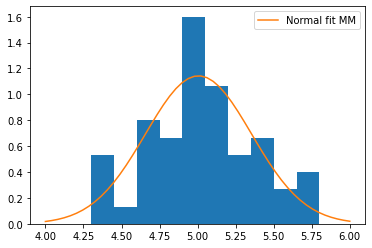

In [9]:
fig,ax = plt.subplots(1,1)
ax.hist(x,density=True)
xx = np.linspace(4,6,50)
ax.plot(xx, st.norm.pdf(xx,muMM,scale=sigmaMM),label='Normal fit MM')
ax.legend(loc='best')
plt.show()

# Bootstrap
How do we find the bias and variance of the estimator? Theoretical derivations of the sampling distributions may be too cumbersome and difficult in most cases. Bootstrap is a Monte Carlo simulation method for computing metrics such as bias, variance and confidence intervals for estimators.

In the above example, we have found $\hat{\mu}_{MM}=5.006...$ and $\hat{\sigma}_{MM}=0.34894...$. Using these values, we simulate $n=50$ *iid* samples from Normal$(5.006...,0.34894...)$ and, using the simulated samples, we compute new estimates of $\mu$ and $\sigma$ and call them $\hat{\mu}_{MM}(1)$ and $\hat{\sigma}_{MM}(1)$. Now, repeat the simulation $N$ times to get estimates $\hat{\mu}_{MM}(i)$ and $\hat{\sigma}_{MM}(i)$, $i=1,2,\ldots,N$.

The sample variance of $\{\hat{\mu}_{MM}(1), \hat{\mu}_{MM}(2),\ldots,\hat{\mu}_{MM}(N)\}$ is taken to be the bootstrap estimate for the variance of the estimator.

In [10]:
N = 1000
n = 50
mu_hat = np.zeros(N)
sigma_hat = np.zeros(N)
for i in np.arange(N):
  xi = st.norm.rvs(muMM,scale=sigmaMM,size=n)
  m1i = np.average(xi); ssi = np.var(xi)
  mu_hat[i] = m1i; sigma_hat[i] = np.sqrt(np.sum(xi**2)/(n) - m1i**2)

We can see the histograms of the estimates to get an idea of the spread of the values.

(array([ 0.25695986,  1.58458582,  4.15418446,  9.37903501, 11.60602049,
         8.35119556,  4.66810418,  2.14133219,  0.51391973,  0.17130658]),
 array([0.23544927, 0.25879922, 0.28214917, 0.30549912, 0.32884907,
        0.35219902, 0.37554897, 0.39889892, 0.42224887, 0.44559882,
        0.46894877]),
 <a list of 10 Patch objects>)

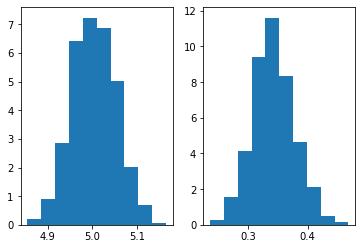

In [11]:
ax1 = plt.subplot(121)
ax1.hist(mu_hat,density=True)
ax2 = plt.subplot(122)
ax2.hist(sigma_hat,density=True)

The histograms look roughly normal.

The sample standard deviations of the estimates is a bootstrap estimate for the standard error of the estimator.

In [12]:
print(np.sqrt(np.var(mu_hat)))
print(np.sqrt(np.var(sigma_hat)))

0.04897069034514343
0.035351454722868034


## Confidence intervals
Suppose a parameter $\theta$ is estimated as $\hat{\theta}$, and suppose the distribution of $\hat{\theta}-\theta$ is known. Then, to obtain $(100(1-\alpha))$% confidence intervals (typical values are $\alpha=0.1$ for 90% confidence intervals and $\alpha=0.05$ for 95% confidence intervals), we use the CDF of $\hat{\theta}-\theta$ to obtain $\delta_1$ and $\delta_2$ such that
$$P(\hat{\theta}-\theta\le\delta_1)=1-\frac{\alpha}{2},$$
$$P(\hat{\theta}-\theta\le\delta_2)=\frac{\alpha}{2}.$$
Actually, the inverse of the CDF of $\hat{\theta}-\theta$ is used to find the above $\delta_1$ and $\delta_2$. From the above, we see that
$$P(\hat{\theta}-\theta \le \delta_1)-P(\hat{\theta}-\theta \le \delta_2)= P(\delta_2< \hat{\theta}-\theta \le \delta_1)=1-\frac{\alpha}{2}-\frac{\alpha}{2}=1-\alpha.$$
The above is rewritten as
$$P(\hat{\theta}-\delta_1\le\theta<\hat{\theta}-\delta_2)=1-\alpha,$$
and $[\hat{\theta}-\delta_1,\hat{\theta}-\delta_2]$ is interpreted as the $100(1-\alpha)$% confidence interval.

## Bootstrap confidence intervals
The CDF of $\hat{\theta}-\theta$ might be difficult to determine in many cases, and the bootstrap method is used often to estimate $\delta_1$ and $\delta_2$. We consider the list of numbers $\{\hat{\mu}_{MM}(1)-5.006...,\ldots,\hat{\mu}_{MM}(N)-5.006...\}$ and pick the $100(\alpha/2)$-th percentile and $100(1-\alpha/2)$-th percentile.

In [13]:
del1 = np.percentile(mu_hat - muMM, 97.5)
del2 = np.percentile(mu_hat - muMM, 2.5)
print([del1,del2])

[0.09529830806485419, -0.09717270493674324]


The 95% confidence interval for $\alpha$ using the method of moments estimator works out to $[5.006-0.08816,5.006-(-0.09467)]=[4.91784,5.10067]$.

## Maximum likelihood
We now turn to the maximum likelihood estimator for $\alpha$ and $\beta$. The likelihood $L(x_1,\ldots,x_n)$ can be written as
$$L = \frac{1}{\sqrt(2\pi)\sigma}e^\frac{-(x_1-\mu)^2}{2\sigma^2}\,\cdots \frac{1}{\sqrt(2\pi)\sigma}e^\frac{-(x_n-\mu)^2}{2\sigma^2}= (\frac{1}{\sqrt(2\pi)\sigma})^ne^\frac{-1}{2\sigma^2} \sum_{i=0}^n{(x_n-\mu)^2},$$

$$\log L = -n\log\sigma-\frac{1}{2\sigma^2}\sum_{i=0}^n{(x_n-\mu)^2}.$$
Differentiating $\log L$ with respect to $\mu$ treating $\sigma$ as constant and equating to zero, we get
$$\hat{\mu}_{ML} = \bar{X} = \frac{x_1+\cdots+x_n}{n} $$
Differentiating $\log L$ with respect to $\sigma$ treating $\mu$ as constant and equating to zero, we get
$$\hat{\sigma^2} = \frac{1}{n}\sum_{i = 1}^n(x_i-\mu)^2.$$

So we got the final solution of both the parameters.

In [22]:
muML = np.average(x)
s_caret_sqrt = np.sqrt(np.sum(np.square(x-muML))/n)
print(muML)
print(s_caret_sqrt)

5.006
0.3489469873777391


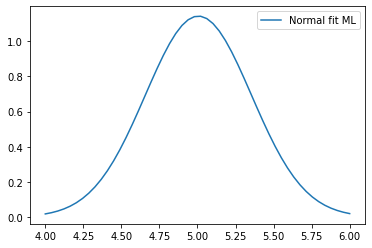

In [24]:
fig,ax = plt.subplots(1,1)
#ax.hist(x,density=True)
xx = np.linspace(4,6,50)
ax.plot(xx, st.norm.pdf(xx,muML,scale=s_caret_sqrt),label='Normal fit ML')
ax.legend(loc='best')
plt.show()